## Laboratorio Desafio 2 - 256

### Bastian Rojas Pereira

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [3]:
# Configuración para mostrar gráficos en Jupyter Notebook
%matplotlib inline

In [5]:
# Cargar el conjunto de datos Iris
data = load_iris()
X = data.data
y = data.target


In [7]:
# Convertir las etiquetas a formato one-hot encoding
y = to_categorical(y)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Introducción al Perceptrón Multicapa (MLP)
El Perceptrón Multicapa (MLP) es un tipo de red neuronal artificial que consiste en múltiples capas de neuronas, conectadas de manera que cada neurona de una capa está conectada a todas las neuronas de la siguiente capa. Estas capas son típicamente:

1. **Capa de Entrada:** Recibe las características del conjunto de datos.
2. **Capas Ocultas:** Procesan las características mediante la aplicación de funciones de activación.
3. **Capa de Salida:** Proporciona el resultado final de la red, que puede ser una clasificación, una regresión, etc.

## Arquitectura del MLP

1. **Capa de Entrada:** En nuestro caso, esta capa tendrá 4 neuronas, correspondientes a las 4 características del conjunto de datos Iris.
2. **Capas Ocultas:** Añadiremos dos capas ocultas con 10 neuronas cada una y una función de activación ReLU.
3. **Capa de Salida:** Tendrá 3 neuronas, correspondientes a las 3 clases del conjunto de datos Iris, con una función de activación softmax para la clasificación.

## Función de Activación ReLU
La función de activación ReLU (Rectified Linear Unit) es una de las funciones de activación más utilizadas en las redes neuronales debido a su simplicidad y efectividad. La ecuación de ReLU es:

$$
\text{ReLU}(x) = \max(0, x)
$$

Esto significa que:

- Si $x$ es mayor que 0, ReLU devuelve $x$.
- Si $x$ es menor o igual a 0, ReLU devuelve 0.

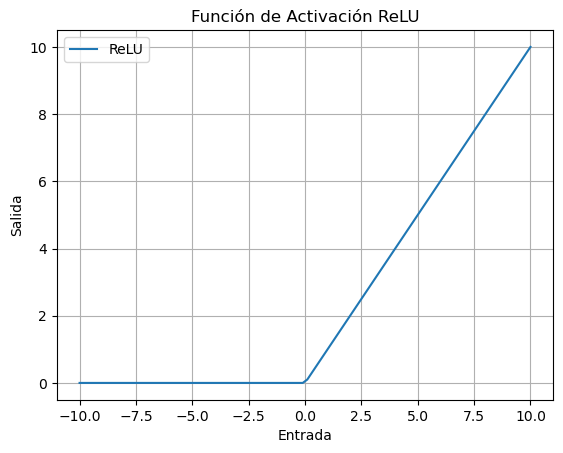

In [10]:
# Definición de la función ReLU
def relu(x):
    return np.maximum(0, x)

# Generar datos para la gráfica
x = np.linspace(-10, 10, 100)
y = relu(x)

# Graficar la función ReLU
plt.plot(x, y, label='ReLU')
plt.title('Función de Activación ReLU')
plt.xlabel('Entrada')
plt.ylabel('Salida')
plt.legend()
plt.grid()
plt.show()

## Construcción del Modelo MLP

In [13]:
# Crear el modelo MLP con 256 neuronas en las capas ocultas
model_256 = Sequential()
model_256.add(Dense(256, input_dim=4, activation='relu'))  # Primera capa oculta con 256 neuronas
model_256.add(Dense(256, activation='relu'))  # Segunda capa oculta con 256 neuronas
model_256.add(Dense(3, activation='softmax'))  # Capa de salida

# Resumen del modelo con 256 neuronas
model_256.summary()

C:\Users\basti\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 67,843 (265.01 KB)

 Trainable params: 67,843 (265.01 KB)

 Non-trainable params: 0 (0.00 B)

## Función de Pérdida `categorical_crossentropy`
La función de pérdida `categorical_crossentropy` se utiliza para problemas de clasificación multiclase. Mide la discrepancia entre dos distribuciones de probabilidad: la distribución real (etiquetas verdaderas) y la distribución predicha por el modelo. La ecuación es:

$$
\text{Categorical Crossentropy} = -\sum_{i=1}^{N} y_i \log(\hat{y}_i)
$$

Donde:
- $y_i$ es la etiqueta verdadera para la clase $i$.
- $\hat{y}_i$ es la probabilidad predicha por el modelo para la clase $i$.
- $N$ es el número total de clases.

La función de pérdida es mínima cuando las distribuciones real y predicha son idénticas, lo que significa que el modelo ha hecho predicciones perfectas.

### Gráfico de la Función de Pérdida `categorical_crossentropy`

Para visualizar cómo cambia la pérdida `categorical_crossentropy`, podemos graficar la pérdida en función de las probabilidades predichas para un conjunto de etiquetas verdaderas.


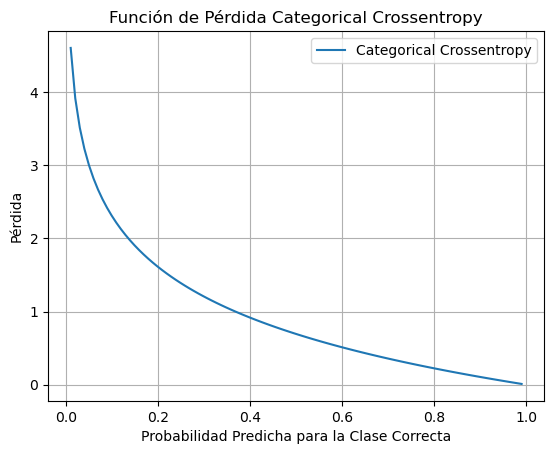

In [16]:

# Definición de la función de pérdida categorical_crossentropy
def categorical_crossentropy(y_true, y_pred):
    return -np.sum(y_true * np.log(y_pred))

# Generar datos para la gráfica
y_true = np.array([0, 0, 1])  # Etiqueta verdadera (one-hot encoding)
y_pred = np.linspace(0.01, 0.99, 100)  # Probabilidades predichas (varían de 0.01 a 0.99)
loss = [categorical_crossentropy(y_true, [1 - p - 0.01, 0.01, p]) for p in y_pred]

# Graficar la función de pérdida categorical_crossentropy
plt.plot(y_pred, loss, label='Categorical Crossentropy')
plt.title('Función de Pérdida Categorical Crossentropy')
plt.xlabel('Probabilidad Predicha para la Clase Correcta')
plt.ylabel('Pérdida')
plt.legend()
plt.grid()
plt.show()


## Compilación del Modelo

Para compilar el modelo, necesitamos especificar el optimizador, la función de pérdida y las métricas de evaluación. Usaremos el optimizador Adam y la función de pérdida `categorical_crossentropy` adecuada para problemas de clasificación multiclase.


In [19]:
# Compilar el modelo
model_256.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Entrenamiento del Modelo

Entrenaremos el modelo utilizando los datos de entrenamiento. Especificamos el número de épocas y el tamaño del lote, además de una porción de datos para validación durante el entrenamiento.



In [22]:
# Entrenar el modelo
history = model_256.fit(X_train, y_train, epochs=50, batch_size=5, validation_split=0.1)


Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4891 - loss: 0.9898 - val_accuracy: 1.0000 - val_loss: 0.5788
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8464 - loss: 0.5134 - val_accuracy: 1.0000 - val_loss: 0.4134
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9021 - loss: 0.3702 - val_accuracy: 1.0000 - val_loss: 0.2890
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9357 - loss: 0.2704 - val_accuracy: 0.9167 - val_loss: 0.2754
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8336 - loss: 0.2763 - val_accuracy: 1.0000 - val_loss: 0.1726
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9662 - loss: 0.1860 - val_accuracy: 1.0000 - val_loss: 0.1764
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9617 - loss: 0.1827 - val_accuracy: 1.0000 - val_loss: 0.1068
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9713 - loss: 0.1326 - val_accuracy: 1.0000 - val_loss


## Evaluación del Modelo

Evaluaremos el rendimiento del modelo utilizando los datos de prueba.



In [25]:
# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model_256.evaluate(X_test, y_test)
print(f'Precisión en el conjunto de prueba: {accuracy * 100:.2f}%')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9667 - loss: 0.0737
Precisión en el conjunto de prueba: 96.67%


## Guardar y Cargar el Modelo

Podemos guardar el modelo entrenado para su uso futuro y cargarlo cuando sea necesario.



In [28]:

# Guardar el modelo
model_256.save('mlp_model_256.h5')

# Cargar el modelo
from tensorflow.keras.models import load_model
model_256 = load_model('mlp_model_256.h5')


## Visualización de Resultados

Visualizamos la precisión y la pérdida durante el entrenamiento para entender mejor el rendimiento del modelo.


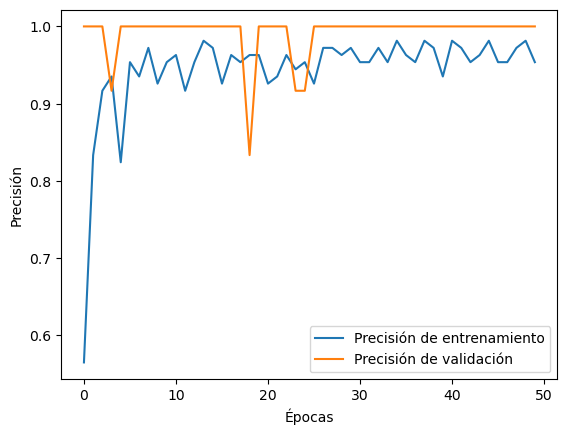

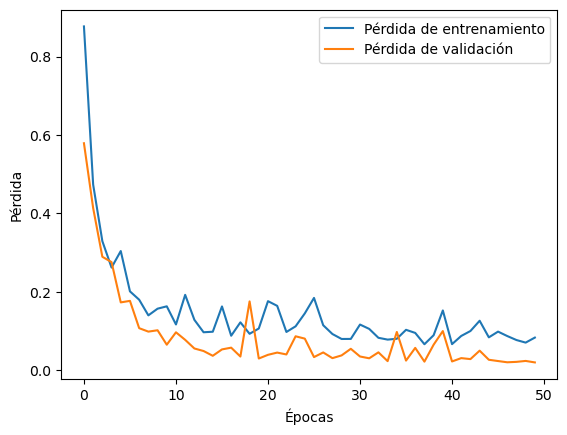

In [31]:
# Graficar la precisión
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()

# Graficar la pérdida
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()
